#### Create a logistic regression model that predicts whether or not a person makes more than $50,000.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in data
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data',header = None, names = col_names)

In [6]:
# Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
# Check class imbalance for income column
df.income.value_counts(normalize=True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

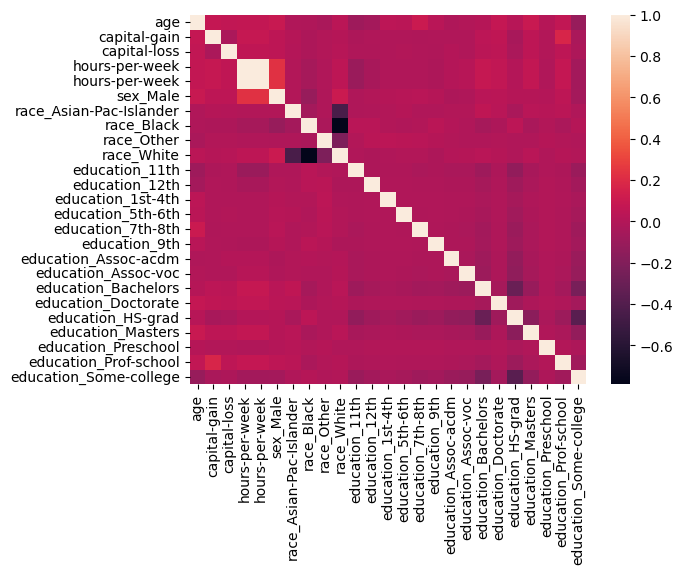

In [13]:
# Create feature dataframe X with feature columns and dummy 
# variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week',\
                 'sex','race', 'hours-per-week', 'education']

X = pd.get_dummies(df[feature_cols], drop_first=True)

# Create a heatmap of X data to see feature correlation
plt.figure()
sns.heatmap(X.corr())#, annot=True)
plt.show()

In [15]:
# Create output variable y which is binary, 0 when income is less 
# than 50k, 1 when it is greater than 50k
y = np.where(df.income=='<=50K', 0, 1)

array([0, 0, 0, ..., 0, 0, 1])

In [17]:
# Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [19]:
# Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:')
print(log_reg.intercept_[0])
print('Model Parameters, Coeff:')
print(log_reg.coef_)

Model Parameters, Intercept:
-5.574051102075731
Model Parameters, Coeff:
[[ 3.66708108e-02  3.14736715e-04  6.66324552e-04  2.79789951e-02
   4.03738514e-03  1.02914892e+00  0.00000000e+00 -3.58823309e-01
   0.00000000e+00  7.67872580e-02 -5.77048523e-01  0.00000000e+00
   0.00000000e+00 -4.02644319e-01 -8.95040241e-01 -5.03321517e-01
   5.72662895e-01  5.45591599e-01  1.28022992e+00  1.79634501e+00
   0.00000000e+00  1.59701097e+00  0.00000000e+00  1.82336836e+00
   3.83093437e-01]]


In [21]:
# Evaluate the predictions of the model on the test set. 
# Print the confusion matrix and accuracy score.
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score:')
print(log_reg.score(x_test, y_test))

Confusion Matrix:
[[4778  248]
 [ 880  607]]
Accuracy Score:
0.8268079226163059


In [23]:
# Create new DataFrame of the model coefficients and variable names; 
# sort values based on coefficient
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
coef_df

,var,coef
14,education_7th-8th,-0.895040
10,education_11th,-0.577049
15,education_9th,-0.503322
13,education_5th-6th,-0.402644
7,race_Black,-0.358823
1,capital-gain,0.000315
2,capital-loss,0.000666
4,hours-per-week,0.004037
3,hours-per-week,0.027979
0,age,0.036671


c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


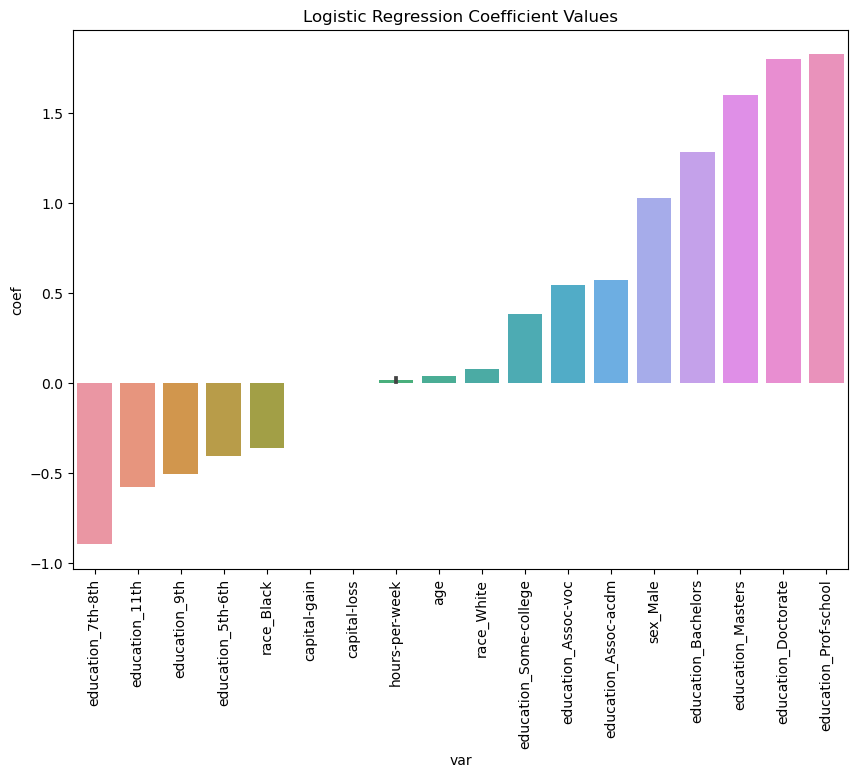

In [26]:
# barplot of the coefficients sorted in ascending order
plt.figure(figsize=(10,7))
sns.barplot(data=coef_df, x='var', y='coef')
plt.xticks(rotation=90)
plt.title('Logistic Regression Coefficient Values')
plt.show()

ROC AUC score:  0.8456298933508098


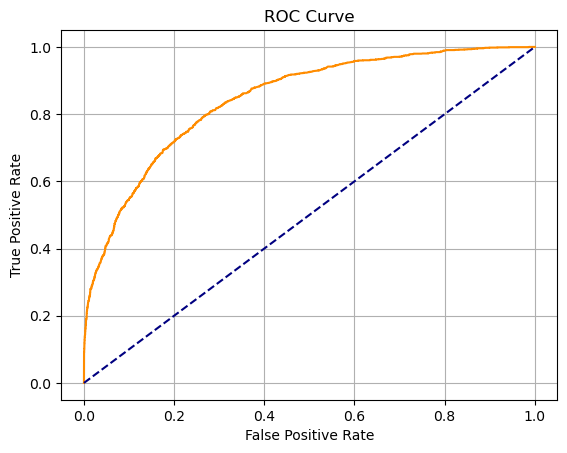

In [29]:
# Plot the ROC curve and print the AUC value
y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print('ROC AUC score: ', roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.grid()
plt.show()